In [85]:
#importing the required libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#1.a
train=pd.read_csv("winequality-white.csv",delimiter=";")

print("Instances(rows) in training data are:",train.shape[0])


Instances(rows) in training data are: 4898


In [86]:
#1.b
print("There are ",train.shape[1]-1," features in the dataset:")
print(list(train.columns[:11]))

print("\nNumber of instance for each class in Train dataset ")
for i in range(3,10):
    print("class label ",i,"count:",train[train['quality']==i].shape[0])

There are  11  features in the dataset:
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

Number of instance for each class in Train dataset 
class label  3 count: 20
class label  4 count: 163
class label  5 count: 1457
class label  6 count: 2198
class label  7 count: 880
class label  8 count: 175
class label  9 count: 5


In [87]:
#i.c

#task 1 c)
from sklearn.utils import shuffle
white_wine=shuffle(train, random_state=20)


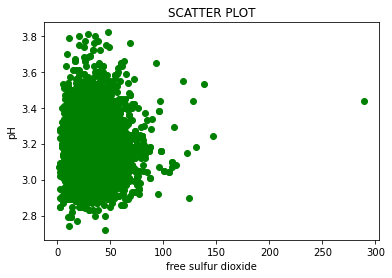

In [88]:
#task 1 d)
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel('free sulfur dioxide')
plt.ylabel('pH')
plt.title("SCATTER PLOT")
plt.scatter(white_wine.loc[:,'free sulfur dioxide'].values,white_wine.loc[:,'pH'].values,color='green')
plt.show()

In [89]:
#task2 a
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
wine_features=sc.fit_transform(white_wine.iloc[:,:].values)
pca_mod= PCA()
pc= pca_mod.fit_transform(wine_features)

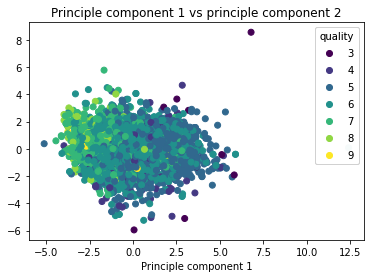

In [90]:
#task2.b
fig, ax = plt.subplots()
scatter=plt.scatter(pc[:,[0]], pc[:,[1]],c=white_wine['quality'],cmap='viridis')
legend = ax.legend(*scatter.legend_elements(),loc="best", title="quality")
ax.add_artist(legend)
ax.set_title("Principle component 1 vs principle component 2")
t = ax.set_xlabel('Principle component 1')
plt.show()

In [91]:
#task2.c
print("Explained variance of each pc:")
j=1
for i in pca_mod.explained_variance_ratio_:
    print("PC",j,":",i)
    j=j+1

Explained variance of each pc:
PC 1 : 0.2788890720776194
PC 2 : 0.1321741912732896
PC 3 : 0.11426433803810737
PC 4 : 0.09040512512928064
PC 5 : 0.08127361415556422
PC 6 : 0.07823024573824626
PC 7 : 0.06410402064252659
PC 8 : 0.06032448128959616
PC 9 : 0.04637508558173557
PC 10 : 0.028577782337310235
PC 11 : 0.023676284915719836
PC 12 : 0.0017057588210040815


In [92]:
#task3 a
val_set=white_wine.iloc[:1000,:].values
#task3.b
test_set=white_wine.iloc[-1000:,:].values
#task3.c
train_set=white_wine.iloc[1000:3898,:].values

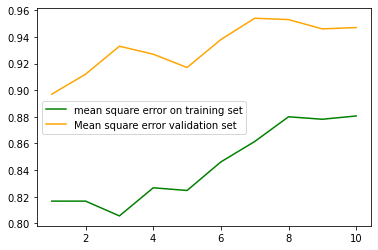

In [93]:
#task4 a
set_train=[300,600,900,1200,1500,1800,2100,2400,2700,2898]
acc_train=[]
acc_val=[]
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score

for i in set_train:
    model = LinearRegression()
    x=train_set[:i,:11]
    y=train_set[:i,[11]]
    model.fit(x,y)
    y_pred = model.predict(x)
    y_pred=np.asarray(y_pred)
    acc_train.append(mean_squared_error(y, y_pred.astype(int)))
    
    x=val_set[:,:11]
    y=val_set[:,[11]]
    y_pred = model.predict(x)
    y_pred=np.asarray(y_pred)
    acc_val.append(mean_squared_error(y, y_pred.astype(int)))
    
plt.plot(range(1,11),acc_train,label="mean square error on training set",color='green')
plt.plot(range(1,11),acc_val,label="Mean square error validation set",color='orange')
plt.legend()
plt.show()



# task 4 b:
I would like to choose set 5 dataset which consists of 1800 points. This dataset gives less error on training set and on validation set. this set is selected as sufficient data must be avaliable for the model to train.

In [94]:
#task 4.c
model = LinearRegression()
x=train_set[:set_train[4],:11]
y=train_set[:set_train[4],[11]]
model.fit(x,y)
y_pred = model.predict(test_set[:,:11])
print("Accuracy on testing dataset:",accuracy_score(test_set[:,[11]], y_pred.astype(int)))
print("MSE on testing dataset:",mean_squared_error(test_set[:,[11]], y_pred.astype(int)))

Accuracy on testing dataset: 0.458
MSE on testing dataset: 0.836


# task 5
#a
In task 1:
there is a huge amount of data. there are 7 classes in the target variable. the dataset is imbalanced.

In task 2:
The 1st 10 components give the 95% of the information.

In task 4:
the error on the dataset was increasing as instance of the dataset were increasing. the error was in range of .80 to 0.95.

#b
As the percentage splits are taken in random they are not dependable. We can use algorithms like Cross validations to improve the accuracy of the model.